In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, exp, pi
from itertools import combinations_with_replacement
from functools import reduce
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

## 4.1 識別関数（判別関数）

In [2]:
def generate_data(N=100, n_outliers=None, third_class=False):
    mean1 = [-1, 1]
    mean2 = [1, -1]
    cov = [[0.5, 0.2],
           [0.2, 0.5]]
    x1 = np.random.multivariate_normal(mean1, cov, N)
    x2 = np.random.multivariate_normal(mean2, cov, N)
    if n_outliers is not None:
        cov_out = [[0.2, 0],
                   [0, 0.2]]
        x2_out = np.random.multivariate_normal([8, -6], cov_out, n_outliers)
        return np.concatenate([x1, x2, x2_out]), np.concatenate([np.zeros(N), np.ones(N+n_outliers)]).astype(int)
    if third_class == True:
        mean3 = [3, -3]
        x3 = np.random.multivariate_normal(mean3, cov, N)
        return np.concatenate([x1, x2, x3]), np.concatenate([np.zeros(N), np.ones(N), 2*np.ones(N)]).astype(int)
    return np.concatenate([x1, x2]), np.concatenate([np.zeros(N), np.ones(N)]).astype(int)

4.1.3 分類における最小二乗

(-8, 4)

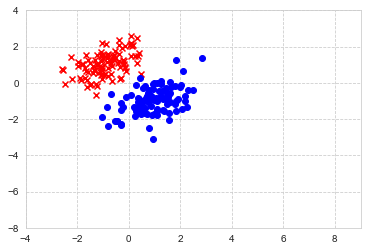

In [3]:
N = 100
N_test = 100
M = 2
K = 2
x_train, t_train = generate_data(N)
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:, 0], x_train[N:, 1], marker='o', color='blue')
plt.xlim(-4, 9)
plt.ylim(-8, 4)

In [4]:
x1_test, x2_test = np.meshgrid(np.linspace(-4, 9, N_test), np.linspace(-8, 4, N_test))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

In [5]:
T_train = np.concatenate([t_train, t_train[::-1]]).reshape(2, -1).T

W = np.linalg.pinv(x_train) @ T_train
y = np.argmax(x_test @ W, axis=-1)

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: No contour levels were found within the data range.
  This is separate from the ipykernel package so we can avoid doing imports until


(-8, 4)

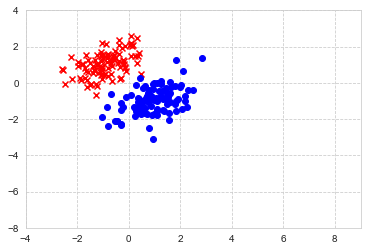

In [6]:
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:, 0], x_train[N:, 1], marker='o', color='blue')
plt.contour(x1_test, x2_test, y.reshape(N_test, N_test), alpha=0.2, colors=['purple'])
plt.xlim(-4, 9)
plt.ylim(-8, 4)

In [7]:
# 外れ値
N_out = 10
N = 100
N_test = 100
x_train, t_train = generate_data(N, n_outliers=N_out)
x1_test, x2_test = np.meshgrid(np.linspace(-4, 9, N_test), np.linspace(-8, 4, N_test))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

In [8]:
# 二乗和誤差関数
T_train = np.concatenate([t_train, t_train[::-1]]).reshape(2, -1).T
W = np.linalg.pinv(x_train) @ T_train
y_square = np.argmax(x_test @ W, axis=-1)

In [9]:
# ロジスティック回帰
sigmoid = lambda x: 1 / (1 + exp(-x))
lr = 0.01
w = np.random.rand(M)
max_iter = 100
for _ in range(max_iter):
    y = sigmoid(x_train @ w)
    grad = x_train.T @ (y - t_train)
    w -= lr * grad
y_logis = sigmoid(x_test @ w)

(-8, 4)

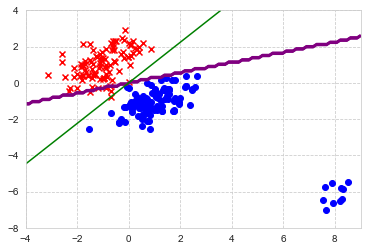

In [10]:
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:, 0], x_train[N:, 1], marker='o', color='blue')
plt.contour(x1_test, x2_test, y_square.reshape(N_test, N_test), colors=['purple'])
plt.contour(x1_test, x2_test, y_logis.reshape(N_test, N_test), 1, colors=['green'])
plt.xlim(-4, 9)
plt.ylim(-8, 4)


4.1.7 パーセプトロンアルゴリズム

(-8, 4)

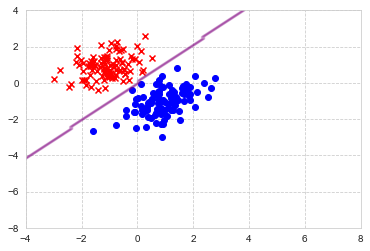

In [11]:
N = 100
N_test = 100
M = 2
x_train, t_train = generate_data(N)
x1_test, x2_test = np.meshgrid(np.linspace(-4, 8, N_test), np.linspace(-8, 4, N_test))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

# データの整形
T_train = np.identity(K)[t_train]
T_train -= T_train[::-1]

# 学習
lr = 0.01
w = np.random.rand(M, M)
max_iter = 100
for _ in range(max_iter):
    w += lr * x_train.T @ T_train
y = np.argmax(x_test @ w, axis=1)

# 結果のプロット
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:, 0], x_train[N:, 1], marker='o', color='blue')
plt.contour(x1_test, x2_test, y.reshape(N_test, N_test), alpha=0.2, colors=['purple'])
plt.xlim(-4, 8)
plt.ylim(-8, 4)

4.3.2 ロジスティック回帰

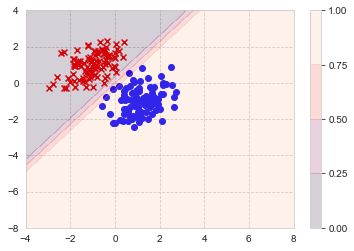

In [12]:
N = 100
N_test = 100
x_train, t_train = generate_data(N)
x1_test, x2_test = np.meshgrid(np.linspace(-4, 8, N_test), np.linspace(-8, 4, N_test))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

# 学習
lr = 0.01
w = np.random.rand(M)
max_iter = 100
for _ in range(max_iter):
    y = sigmoid(x_train @ w)
    grad = (y - t_train).T @ x_train
    w -= lr * grad

y = sigmoid(x_test @ w)
# 結果のプロット
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:, 0], x_train[N:, 1], marker='o', color='blue')
plt.contourf(x1_test, x2_test, y.reshape(N_test, N_test), np.linspace(0, 1, 5), alpha=0.2)
plt.xlim(-4, 8)
plt.ylim(-8, 4)
plt.colorbar()

4.3.4 多クラスロジスティック回帰

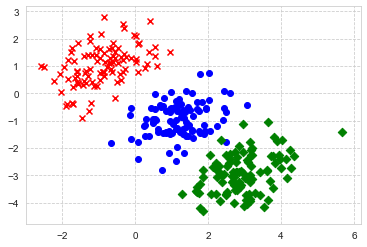

In [13]:
N = 100
N_test = 100
K = 3
M = 1
x_train, t_train = generate_data(N, third_class=True)
x1_test, x2_test = np.meshgrid(np.linspace(-4, 8, N_test), np.linspace(-8, 4, N_test))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:2*N, 0], x_train[N:2*N, 1], marker='o', color='blue')
plt.scatter(x_train[2*N:, 0], x_train[2*N:, 1], marker='D', color='green')

In [14]:
# t_trainを1-of-Kに変換
T_train = np.identity(K)[t_train]
phi_train = [np.ones(K*N)]
phi_test = [np.ones(N_test**2)]
for i in range(1, M+1):
    for data in combinations_with_replacement(x_train.T, i):
        phi_train.append(reduce(lambda x, y:x * y, data))
for i in range(1, M+1):
    for data in combinations_with_replacement(x_test.T, i):
        phi_test.append(reduce(lambda x, y:x * y, data))
phi_train = np.array(phi_train).T
phi_test = np.array(phi_test).T

In [15]:
# 学習
softmax = lambda x: exp(x) / np.sum(exp(x), axis=-1, keepdims=True)

lr = 0.01
w = np.random.rand(phi_train.shape[1], K)
max_iter = 1000
for _ in range(max_iter):
    y = softmax(phi_train @ w)
    grad = phi_train.T @ (y - T_train)
    w -= lr * grad

In [16]:
y = np.argmax(phi_test @ w, axis=-1)

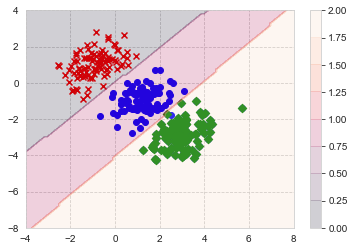

In [17]:
# 結果のプロット
plt.scatter(x_train[:N, 0], x_train[:N, 1], marker='x', color='red')
plt.scatter(x_train[N:, 0], x_train[N:, 1], marker='o', color='blue')
plt.scatter(x_train[2*N:, 0], x_train[2*N:, 1], marker='D', color='green')
plt.contourf(x1_test, x2_test, y.reshape(N_test, N_test), alpha=0.2)
plt.xlim(-4, 8)
plt.ylim(-8, 4)
plt.colorbar()
